# Machine Learning: Aprendizaje supervisado

*Sebastian Pérez*

### Machine Learning

El machine learning o aprendizaje automático consiste básicamente en automatizar, mediante distintos algoritmos, la identificación de patrones o tendencias que se esconden, o que no son visibles de forma sencilla dentro de los datos. Es una rama de la inteligencia artificial que empezó a cobrar importancia a partir de los años 80. Se trata de un tipo de IA que ya no depende de unas reglas y un programador, sino que la computadora puede establecer sus propias reglas y aprender por sí misma. <br>

A groso modo es una automatización de tareas cognitivas (de pensamiento). Por ejemplo, para dar un crédito, las subdividimos en tareas cognitivas sencillas y en función de eso predecir si es buena idea darle el credito o no.

El objetivo del machine learning es crear un modelo que nos permita resolver una tarea dada. Luego se entrena el modelo usando gran cantidad de datos. El modelo aprende de estos datos y es capaz de hacer predicciones. Es, por lo tanto, un proceso de inducción del conocimiento, es decir, un método que permite obtener por generalización un enunciado general a partir de enunciados que describen casos particulares. Según la tarea que se quiera realizar, será más adecuado trabajar con un algoritmo u otro. <br>

Las diferentes clases cognitivas son los tipos de implementación de machine learning. Pueden clasificarse en tres categorías diferentes: <br>

* Aprendizaje supervisado - Generalización:
  * Lo primero que haces es sacar características de os objetos (forma, color, tamaño,etc). Después buscas una relacion entre las caracteristicas y el objetivo (aceptado o no). Y ya podemos predecir el objetivo para el objeto. <br>
  * Se llama supervidado porque a cada elemento se le asigna una variable objetivo. 
    * Cuando el objetivo es una **etiqueta** es una **clasificación**  
    * Cuando el objetivo es un **número** es una **regresión**.
Limitación: solo aprendes del pasado. 
* Aprendizaje no supervisado - Comparación:
  * Extraes características de cada objeo (forma, color, tamaño.). Despues buscamos una definicion de similitud entre elementos basados en las caracteristicas. **No hay objeto**
  * Compara elementos sin objetivo. Se realiza para:
    * Segmentación
    * Simplificación de caracteristicas
    * Recomendación
* Aprendizaje de refuerzo según la naturaleza de los datos que recibe. - Recompensa:
  * Aprende de las recompensas para mejorar

### Aprendizaje supervisado:

En el aprendizaje supervisado, los algoritmos trabajan con datos etiquetados (labeled data), intentado encontrar una función que, dadas las variables de entrada (input data), les asigne la etiqueta de salida adecuada. El algoritmo se entrena con un histórico de datos y así aprende a asignar la etiqueta de salida adecuada a un nuevo valor, es decir, predice el valor de salida. <br>

El aprendizaje supervisado se suele usar en: <br>

* Problemas de clasificación: predecir variables categóricas o discreta. Ej.: identificación de dígitos, diagnósticos, o detección de spam.
* Problemas de regresión: predecir variables numéricas continuas. Ej.: predicciones meteorológicas, de expectativa de vida, de crecimiento...etc. <br>

Los algoritmos más habituales que se aplican en el aprendizaje supervisado son:

* Regresión lineal
* Regresión logística
* K nearest neighbourhoods - KNN
* Árboles de decisión y random forests
* Clasificación de Naïve Bayes
* Support Vector Machines (SVM)
* Métodos Ensemble (Conjuntos de clasificadores)

Tareas de un Data Scientist:
1. Encontrar las mejores características
2. Saber a tipo de tarea cognitiva pertenece el problema
3. Dar mejor métrica para ese negocio

### Regresión: 

En este punto se van a estudiar tres algoritmos de regresión, algunos de ellos son exclusivos del ámbito de la regresión como la regresión linea, mientras que otros como k-NN permite se puede aplicar tanto en regresiones como clasficaciones modificando ligeramente algunos parámetros del modelo. <br>

A través del siguiente ejercicio, los diferentes tipos de modelos de regresión se van a comparar: <br>

* Regresión lineal
* k-NN para regresión
* Árboles de decisión para regresión <br>

### EX1) Dataset que contiene información del:
  * Precio - **Objetivo** de diferentes viviendas, 
  * en función de su Área - **Característica** 

##### 1. Importamos las librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


##### 2. Abrimos los datos

In [4]:
df = pd.read_csv("house_prices.csv")

#Echamos un vistazo a las primeras filas
df.head()
#Tenemos 81 columnas diferentes

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Nombre de las columnas
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

##### 3. Seleccionamos una cantidad de datos

In [6]:
# Variable superficie total
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Máscara casas menores de 6000 sqft
df = df[df['TotalSF']<6000]

##### 4. Preparación de los datos. <br>
Dividimos los datos en dos tablas:

    * X - Características: Es un dataframe
    * y - Objetivo: Es una serie

In [7]:
# Preparación datos
X = df[['TotalSF']]   # pandas DataFrame
y = df['SalePrice']   # pandas Series

##### 5. Visualización de los datos

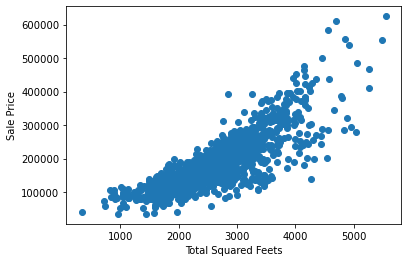

In [8]:
# Precio vivienda en función del número de sqft (squared feets)
plt.scatter(X, y)
plt.xlabel('Total Squared Feets')
plt.ylabel('Sale Price');

## Comparación de los algoritmos de Regresión

###  1) Regresión lineal

En estadística, la regresión lineal es un modelo matemático usado para aproximar la relación de dependencia entre una variable independiente $x$, y la variable dependiente $y$. Este modelo asume que existe una relación lineal entre la variable $x$ y la varible $y$, más un término denominado error aleatorio que sigue una distribución normal de media cero, $\epsilon$ ~ $N(0,\sigma)$. Matemáticamente se puede expresar como:

$$ y = f(x) + \epsilon = \alpha + \beta  x + \epsilon $$ 

Una vez se ha analizado la correlación de dos variables, el siguiente paso es obtener el modelo de predicción de de $y$ en base a $x$. En la primera ecuación encontramos que existen dos parámetros desconocidos, $\alpha$ (intercepto u ordenada en el origen) y $\beta$ (pendiente), que será necesario estimar. Una vez utilicemos nuestro data set de entrenamiento para obtener el valor de estos coeficientes, podremos predecir un valor $\hat{y}$ en base a la variable $x$.

$$ \hat{y} = \hat{f}(x) = \hat{\alpha} + \hat{\beta} x $$

Existen modelos en los que a veces no es suficiente el uso de una variable independiente $x$ para predecir una variable independiente $y$, es en estos casos donde entra en juego la regresión lineal múltiple, donde se tienen en cuenta un número $p$ de variables.

$$ y = f(x) + \epsilon = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_p x_p + \epsilon $$

Donde $x$ es la variable independiente, $y$ es la variable dependiente y $\epsilon$ es la perturbación (error de medición de la variable dependiente), es decir, el resto de factores diferentes a $x$ que afectan a $y$. La perturbación es una variable no observable. <br>

Al igual que en el caso de la regresión lineal, estos coeficiente son desconocidos y tendrán que ser estimados para poder definir el modelo de predicción de la variable $\hat{y}$.

$$ \hat{y} = \hat{f}(x) = \hat{\beta}_0 + \hat{\beta}_1  x_1 + \hat{\beta}_2  x_2 + ... + \hat{\beta}_p x_p $$

Para estimar estos coeficientes se utiliza el método de los mínimos cuadrados, el cual trata de reducir para cada puntos el residuo, i.e., reducir la suma de los cuadrados de los residuos $RSS$. Dado que en la regresión lineal múltiple existen más variables, será necesario emplear métodos matriciales para hallar analíticamente los coeficientes.

$$\begin{bmatrix}{y_1}\\{y_2}\\{y_3}\\{...}\\{y_k}\end{bmatrix}=\begin{bmatrix}{x_{11}}&{x_{12}}&{x_{13}}&{...}&{x_{1k}}\\{x_{21}}&{x_{22}}&{x_{23}}&{...}&{x_{2k}}\\{x_{31}}&{x_{32}}&{x_{33}}&{...}&{x_{3k}}\\{x_{n1}}&{x_{n2}}&{x_{n3}}&{...}&{x_{nk}}\end{bmatrix}·\begin{bmatrix}{w_1}&{w_2}&{w_3}&{...}&{w_k}\end{bmatrix}+\begin{bmatrix}{\epsilon_1}\\{\epsilon_2}\\{\epsilon_3}\\{...}\\{\epsilon_k}\end{bmatrix}$$

Estos coeficientes se pueden obtener de forma analítica mediante el método de los mínimos cuadrados, o de forma iterativa mediante el uso del algoritmo del gradiente descendente.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
#Creo mi regresor
reg = LinearRegression()

In [11]:
#Hace el fit de todas las combinaciones
reg.fit(X,y)

LinearRegression()

In [12]:
#Pasamos un dataframe con tres valores de áreas para predecir su valor
X_pred = pd.DataFrame([ [1000], [1500], [4000]])
X_pred
#reg.predict([ [1000], [200], [4000]])

,0
0,1000
1,1500
2,4000


In [13]:
#Precios de los tres áreas seleccionados
reg.predict(X_pred)

array([ 50217.33439988,  92112.97793231, 301591.19559442])

In [14]:
#Coeficientes
reg.coef_

array([83.79128706])

In [15]:
#Predicción de todos los valores de áreas
y_pred = reg.predict(X)

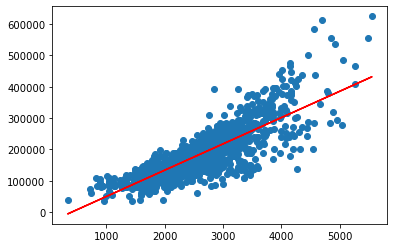

In [16]:
#Visualización de los datos
plt.scatter(X,y)
plt.plot(X,y_pred, 'r')

In [17]:
#Coeficientes de la correlación lineal
np.corrcoef(X['TotalSF'],y)

array([[1.        , 0.82403696],
       [0.82403696, 1.        ]])

#### Evaluamos el modelo de regresión lineal
Elegimos una cantidad de valores para entrenar el modelo y otra cantidad para evaluarlo.
Cual es el problema que tendríamos mil pares valores.
Para solucioar esto y solo tener un valor. Estos valore se llaman métricas:
* MAE: es la suma de los valores absolutos del error.

$$\frac{1}{n}\sum_{i=1}^n{|y_i-x_i|} = \frac{1}{n}\sum_{i=1}^{n}|e_i|$$

* MAPE: es practicamente lo mismo que MAE pero en porcentaje

$$\frac{1}{n}\sum_{i=1}^n{\frac{|y_i-x_i|}{|y_i|}} = \frac{1}{n}\sum_{i=1}^{n}\frac{|e_i|}{|y_i|}$$

In [18]:
#Primero hacemos el split entre set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#test_size = tamaño del test (20%)

In [19]:
#Entrenamos primero los dos X e y
reg.fit(X_train,y_train)

LinearRegression()

In [20]:
#Predecimos y, que es el que queremos porque X es el objeto
y_pred = reg.predict(X_test)

In [21]:
y_pred

array([114311.52265523, 145778.217657  , 143211.1978016 ,  45333.21492767,
       236617.59770159, 133108.73256419, 196207.73675195, 189997.2048437 ,
       149173.30843351, 335489.26568083, 145861.02474911, 138739.61482766,
       116381.69995798, 268746.74944024, 207138.27291046,  38294.61209833,
       180308.77506684, 370765.08691966, 233305.31401719, 211113.01333173,
       211527.04879228, 222209.16367446, 151657.52119681, 273549.56078261,
       205316.51688404, 166894.02614503, 136917.85880124, 111413.27443139,
       213514.41900292, 160352.26586835, 113731.87301046, 301041.5153631 ,
       216992.31687154, 125987.32264273, 171696.83748741, 156460.33253918,
       219559.33672694, 215667.40339778, 240592.33812286,  41358.47450639,
       103463.79358883, 221546.70693758, 242579.7083335 , 103960.63614149,
       131949.43327465, 194882.82327819, 106113.62053635, 126484.16519539,
       177824.56230354, 149173.30843351, 122675.03895834, 117375.3850633 ,
       187927.02754095, 1

Cargamos métricas

In [22]:
# Error absoluto medio
from sklearn.metrics import mean_absolute_error

In [23]:
mean_absolute_error(y_test,y_pred) #Primero valor real

31020.859780038136

In [24]:
# Error cuadrático medio
from sklearn.metrics import mean_squared_error

In [25]:
#R^2
from sklearn.metrics import r2_score

In [26]:
# Use against predictions
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs(y_test-y_pred)/y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 31020.859780038136
mape score is 0.18628789528729348
mse score is 1959690346.7317922
rmse score is 44268.3899270325
r2 score is 0.7123012071049333


In [27]:
#Hago un dataframe con  los resultados obtenidos llamado 'metrics'
metrics_regl = pd.DataFrame(data=scores, index=['reg_lin'])
metrics_regl

,mae,mape,mse,rmse,r2
reg_lin,31020.85978,0.186288,1.959690e+09,44268.389927,0.712301


#### K nearest neighbourhoods - KNN

En machine learning, un método sencillo de clasificación y regresión es el de los $k$ vecinos más cercanos (en inglés K-nearest neighbors, k-NN). Se usará la notación $NN(k, x_\varphi)$ para denotar el conjunto de los $k$ vecinos más cercanos al objeto $x_\varphi$. <br>

En la regresión por k-NN, la salida es un valor de un atributo del objeto; ese valor se puede calcular usando el promedio de los valores de los $k$ vecinos. La palabra cercano implica el concepto de distancia, ya que este método está basado en la distancia existente entre el objeto $x_\varphi$ y sus $k$ vecinos más cercanos. Típicamente se puede usar la distancia Euclidiana, aunque también podemos encontrar otras métricas como la distancia Manhattan (o taxi), o la de Minkowski. <br>

**Distancia Euclidea:** <br>

La distancia euclídea entre dos puntos $x_i$ y $x_j$ se define como la longitud del segmento que une ambos puntos. En coordenadas cartesianas, la distancia euclídea se calcula empleando el teorema de Pitágoras. Su fórmula es: <br>

$$\begin{align}
D_1(x_i, x_j) =\sqrt{(x_{i1}-x_{j1})^2+(x_{i2}-x_{j2})^2+...+(x_{in}-x_{jn})^2}=\sqrt{\sum_{k=1}^{n} (x_{ik}-x_{jk})^2}
\end{align}$$
Es común normalizar los datos de cada una de las dimensiones del objeto, para evitar que un cambio en la escala en alguna de las dimensiones, afecte el resultado. <br>

Principales parámetros del modelo: <br>

* n_neighbors: número $k$ de vecinos
* weight: uniform, distance...etc, como se pondera la distancia de los vecinos al objeto $x_\varphi$

In [28]:
# Cargamos la libreria
from sklearn.neighbors import KNeighborsRegressor


In [29]:
#Creamos la instancia
regk = KNeighborsRegressor(n_neighbors=5)

In [30]:
#Entrenar el modelo
regk.fit(X_train, y_train)

# Predicción
y_predk = regk.predict(X_test)

In [31]:
# Use against predictions
mae = mean_absolute_error(y_test, y_predk)
mape = np.mean(np.abs(y_test-y_pred)/y_predk)
mse = mean_squared_error(y_test, y_predk)
rmse = np.sqrt(mean_squared_error(y_test, y_predk))
r2 = r2_score(y_test, y_predk)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 32103.24948453609
mape score is 0.1745178628337182
mse score is 2226761687.9670105
rmse score is 47188.575820499296
r2 score is 0.6730929196229953


In [32]:
#Hago un dataframe con  los resultados obtenidos llamado 'metrics'
metrics_regk = pd.DataFrame(data=scores, index=['reg_k'])
metrics_regk

,mae,mape,mse,rmse,r2
reg_k,32103.249485,0.174518,2.226762e+09,47188.57582,0.673093


In [33]:
#Hacemos un dataframe con todas las métricas y comparamos la regresión lineal y k vecinos
m = pd.concat([metrics_regl,metrics_regk])
m

,mae,mape,mse,rmse,r2
reg_lin,31020.859780,0.186288,1.959690e+09,44268.389927,0.712301
reg_k,32103.249485,0.174518,2.226762e+09,47188.575820,0.673093


Resumen:

0. Primero hacemos el split entre set de entrenamiento y test
    * from sklearn.model_selection import train_test_split <br>
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

----------------------------------------------------------------------------------------------------
### Regresión lineal

1. Importamos el modelo
    * from sklearn.linear_model import LinearRegression

2. Crear una instancia
    * reg = LinearRegression()

3. Entrenamos el modelo
    * reg.fit(X_train,y_train)

4. Predicciones del test 
    * y_pred = reg.predict(X)

### K nearest neighbourhoods - KNN

1. Importamos el modelo
    * from sklearn.neighbors import KNeighborsRegressor

2. Crear una instancia
    * reg_kn = KNeighborsRegressor(n_neighbors=5)

3. Entrenamos el modelo
    * regk.fit(X,y)

4. Predicciones del test 
    * y_pred = regk.predict(X_test)

### Conjuntos de test y entrenamiento
Una práctica habitual dentro del ámbito del aprendizaje automático, es dividir el fichero en dos subconjuntos. El primero de ellos será para el entrenamiento del modelo, cuyo tamaño suele comprender entre el 70-80% del dataset, y el segundo para testear el modelo obtenido a partir de los datos de entrenamiento.

Esta práctica trata de eliminar los problemas de overfitting o sobreajuste que tendrían lugar si utilizasemos todo el dataset como conjunto de entrenamiento.

Para dividir un dataset en conjunto de test y en conjunto de entrenamiento, podemos utilizar la función .train_test_split(inputs, outputs, test_size, random_state) de la librería scikit-learn.

inputs: variables predictoras $X$
outputs: variable dependiente $y$
test_size: % del dataset que se va a utilizar como subconjunto de test
random_state: seed de los número aleatorios, este parámetro es opcional, pero permite que siempre se obtengan los mismo números aleatorios. <br>

**train_test_split snippet** <br>

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Cross validation

En el punto anterior se explica la división de un dataset en un conjunto de entrenamiento y otro de test, para evaluar la bondad de ajuste del modelo. Como esta división se realiza mediante números aleatorios, podemos obtener un resultado diferente cada vez que se ejecuta. La validación cruzada (cross validation) es una técnica utilizada para evaluar que los resultados del análisis estadístico son independientes de las particiones entre subconjuntos de test y entrenamiento.

Esta técnica divide un dataset en subconjunto de test y entrenamiento de $k$ formas diferentes, y para cada una de estas formas calcula todos los parámetros. Por último se hace la media aritmética de los parámetros de cada validación, y se obtiene una media de los datos. Este método disminuye errores en la estimación de parámetros de cada modelo, y minimiza otras casuísticas como el overfitting.

Dentro del método de validación cruzada, en función del número $k$ en el que dividamos el dataset podemos definir 3 métodos:

k = 1: validación cruzada simple
k = 5-10: K-fold cross validation
k = n: Leave One Out Cross Validation (LOOCV)
En función del valor de $k$, podremos experimentar una compensación del sesgo-varianza, teniendo para valores de $k$ muy elevadas, modelos con un sesgo bajo pero con una varianza muy elevada, es decir overfitting. En bibliografía de referencia como An Introduction to Statistical Learning, se recomienda utilizar el método k-fold cross validation. <br>

**cross validation score snippet** <br>

* from sklearn.model_selection import cross_val_score
* clf_kn = KNeighborsClassifier(n_neighbors=7)
* cross_val_score(clf_kn, X, y, cv=5, scoring='accuracy').mean()

In [34]:
from sklearn.model_selection import cross_val_score


In [35]:
cross_val_score(reg,X,y,scoring="neg_mean_absolute_error") #Por defecto son 5 cachos

array([-31590.33866136, -31060.2137948 , -30549.12490917, -29461.90971854,
       -32604.542219  ])

In [36]:
#Nos quedamos con la media de todos los cortes de la regresión lineal
cross_val_score(reg,X,y,scoring="neg_mean_absolute_error").mean()

-31053.225860573915

In [37]:
#Nos quedamos con la media de todos los cortes de K vecinos
cross_val_score(regk,X,y,scoring="neg_mean_absolute_error").mean()

-32105.07298969072

Observamos que la regresión lineal es mejor, el valor es menor en valor absoluto

### GridSearchCV
Encuentra el mejor k dandole un scoring

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                        param_grid={'n_neighbors':np.arange(3,50)},
                        scoring="neg_mean_absolute_error")


In [40]:
#Fit will test all of the combination
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='neg_mean_absolute_error')

In [41]:
#Saber el mejor
reg_gs.best_params_

{'n_neighbors': 44}

In [42]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
reg_gs_new = GridSearchCV(KNeighborsRegressor(),
                        param_grid={'n_neighbors':np.arange(3,50)},
                        scoring="neg_mean_absolute_error")
reg_gs_new.fit(X,y)
reg_gs_new.best_params_

{'n_neighbors': 44}

In [43]:
regk = KNeighborsRegressor(n_neighbors=75)

In [44]:
#Para k vecinos = 75
cross_val_score(regk,X,y,scoring="neg_mean_absolute_error").mean()

-30215.06387170676

In [45]:
regk.fit(X,y)

KNeighborsRegressor(n_neighbors=75)

Ploteamos

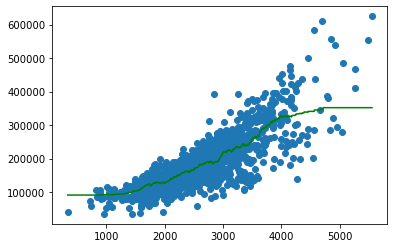

In [46]:
plt.scatter(X,y)
area_ficticias = np.linspace(X['TotalSF'].min(),X['TotalSF'].max(),1000)
plt.plot(area_ficticias,regk.predict(pd.DataFrame(area_ficticias)),'g')

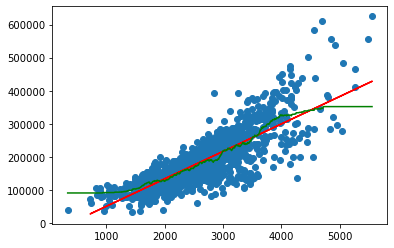

In [47]:
plt.scatter(X,y)
plt.plot(X_test,y_pred,c="red")
area_ficticias = np.linspace(X["TotalSF"].min(),X["TotalSF"].max(),1000)
plt.plot(area_ficticias,regk.predict(pd.DataFrame(area_ficticias)),c="green")

**MIRAR: SOBREAJUSTE y SUBAJUSTE**
* Parámetro para saber si tienes un sobre o sub ajuste -> **Métrica**

* Si cojo un k pequeño -> **OVERFIT** 
* Si cojo un k muy grande -> **UNDERFIT** 

In [48]:
#Vemos como avanza, el progreso que tiene
from tqdm import tqdm_notebook as tqdm

Este modelo necesita definir un parámetro cuando se modeliza. Para obtener el valor del parámetro que consigue una mejor bondad de ajuste del modelo, se pueden probar diferentes valores y e ir monitorizando una métrica para visualizar en que punto se obtiene el modelo mejor ajustado.

In [49]:
# Graficar error en función del número de vecinos
metricas=[]
for k in tqdm(np.arange(1,200)):
  regkt = KNeighborsRegressor(n_neighbors=k)
  res = cross_val_score(regkt,X,y,scoring="neg_mean_absolute_error").mean()
  metricas.append(res)

<ipython-input-49-7230d35eadda>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(np.arange(1,200)):


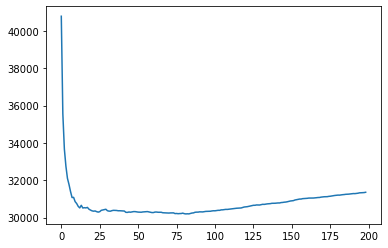

In [50]:
plt.plot(-np.array(metricas))

In [51]:
# Graficar error en función del número de vecinos
metricas=[]
for k in tqdm(np.arange(10,200)):
  regkt = KNeighborsRegressor(n_neighbors=k)
  res = cross_val_score(regkt,X,y,scoring="neg_mean_absolute_error").mean()
  metricas.append(res)

<ipython-input-51-3531a2b7ad6a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for k in tqdm(np.arange(10,200)):


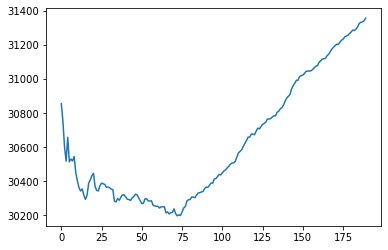

In [52]:
plt.plot(-np.array(metricas))

#### Arbol de decisión - Particiones

Los métodos de machine learning basados en árboles comprenden un conjunto de técnicas de aprendizaje supervisado no paramétricas, que permiten segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones y predecir la variable respuesta. Dado que el conjunto de reglas de división utilizadas para segmentar el espacio predictor se puede resumir en un árbol, este tipo de efoques se conocen como métodos de árboles de decisión.

Aunque los métodos basados en árboles de decisión simples tienen ventajas como la simplicidad y la interpretabilidad, no son competitivos en cuanto a precisión si los comparamos con otros enfoques. Es por esto que en este notebook también veremos otros algoritmos basados en árboles como bagging, random forests o boosting. Estos métodos mejoran el desempeño de los árboles simples combinando (ensemble methods) varios de ellos, a costa de perder un poco interpretabilidad.

Aunque el porcentaje mayoritario de aplicación es el campo de la clasificación, también se pueden emplear en regresiones de variables continuas.

La interpretación geométrica de estos modelos es sencillamente intuitiva, y consiste en ir dividiendo el espacio de forma recursiva en dos rectángulos, donde todos las observaciones contenidas dentro del mismo rectángulo, tendrán el mismo valor de salida.

En el caso de utilizar este algoritmo en problemas de regresión, en lugar de usar Gini como medida de impureza, se utiliza el MSE (mean squared error), el error cuadrático medio. <br>

**Principales parámetros del modelo:** <br>

* max_depth: máxima profundidad, crea $2^n$ divisiones
* min_sample_leaf: mínimo número de muestras por hoja
* min_samples_split: mínimo número de muestras por nodo para subdividirse

In [53]:
from sklearn.tree import DecisionTreeRegressor



In [54]:
# 2 - Crear una instancia
regd = DecisionTreeRegressor(max_depth=3) 
#Max_depth: Number of splits; 
#min_sample: Minumum number of observations

In [55]:
cross_val_score(regd,X,y,scoring="neg_mean_absolute_error").mean()

-30922.044940415257

In [56]:
reg_gd = GridSearchCV(DecisionTreeRegressor(),
                      param_grid={"max_depth":np.arange(2,11),
                                  "min_samples_leaf":np.arange(10,100,15)},
                      scoring="neg_mean_absolute_error")


In [57]:
# 3 - Entrenar el modelo
reg_gd.fit(X, y)



GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': array([10, 25, 40, 55, 70, 85])},
             scoring='neg_mean_absolute_error')

In [59]:
reg_gd.best_params_

{'max_depth': 5, 'min_samples_leaf': 40}

In [60]:
import sklearn
#sorted(sklearn.metrics.SCORERS.keys())

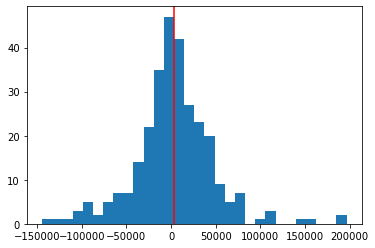

In [61]:
plt.hist(y_test-y_pred,bins=30)
plt.axvline(x=np.mean(y_test-y_pred),c="red")

In [2]:
!pip install pydotplus
!pip install graphviz

In [62]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO

dot_data = StringIO()

export_graphviz(reg_gd.best_estimator_, out_file=dot_data,filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

import graphviz
Image(graph.create_png())

InvocationException: GraphViz's executables not found

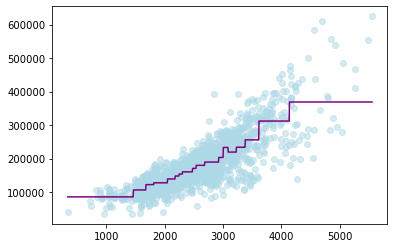

In [63]:
plt.scatter(X,y, c='lightblue', alpha=0.5)
area_ficticias = np.linspace(X["TotalSF"].min(),X["TotalSF"].max(),1000)
plt.plot(area_ficticias,reg_gd.best_estimator_.predict(pd.DataFrame(area_ficticias)),c="purple")

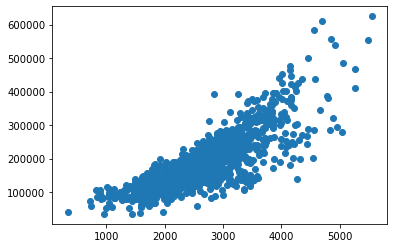

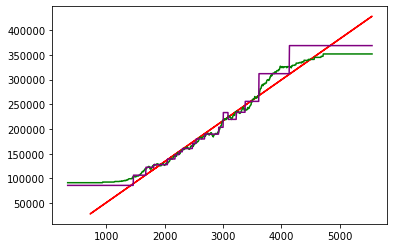

In [64]:
plt.scatter(X,y)

plt.show()
plt.plot(X_test,y_pred,c="red")
area_ficticias = np.linspace(X["TotalSF"].min(),X["TotalSF"].max(),1000)
plt.plot(area_ficticias,regk.predict(pd.DataFrame(area_ficticias)),c="green")
plt.plot(area_ficticias,reg_gd.best_estimator_.predict(pd.DataFrame(area_ficticias)),c="purple")

In [65]:
cross_val_score(reg_gd.best_estimator_,X,y,scoring="neg_mean_absolute_error").mean()

-30334.626243915653

In [66]:
# Use against predictions
mae = mean_absolute_error(y_test, y_predk)
mape = np.mean(np.abs(y_test-y_pred)/y_predk)
mse = mean_squared_error(y_test, y_predk)
rmse = np.sqrt(mean_squared_error(y_test, y_predk))
r2 = r2_score(y_test, y_predk)

scores = {'mae': mae, 'mape': mape, 'mse': mse, 'rmse': rmse, 'r2': r2}

for key in scores:
    print(f"{key} score is {scores[key]}")

mae score is 32103.24948453609
mape score is 0.1745178628337182
mse score is 2226761687.9670105
rmse score is 47188.575820499296
r2 score is 0.6730929196229953
